# Mini Python Bonus 3
How to work with plain text data using `Pandas`

### What's is our toy dataset?

In [1]:
import os

In [2]:
cwd = os.getcwd()

In [3]:
cwd

'/Users/jin/minipy/notebooks/Session_3/Episode_Bonus'

In [4]:
root_dir = os.path.dirname(os.path.dirname(os.path.dirname(cwd)))
babynames_path = os.path.join(root_dir, 'datasets', 'babynames')
os.path.join(babynames_path, 'yob2016.txt')

'/Users/jin/minipy/datasets/babynames/yob2016.txt'

In [5]:
# command line tool
!head -n 10 /Users/jin/minipy/datasets/babynames/yob2016.txt

In [6]:
!grep "Alice" /Users/jin/minipy/datasets/babynames/yob2016.txt

In [8]:
import pandas as pd

baby2016 = pd.read_csv("/Users/jin/minipy/datasets/babynames/yob2016.txt",
                           names=['name', 'gender', 'nbirth'])

baby2016.head(10)

,name,gender,nbirth
0,Emma,F,19414
1,Olivia,F,19246
2,Ava,F,16237
3,Sophia,F,16070
4,Isabella,F,14722
5,Mia,F,14366
6,Charlotte,F,13030
7,Abigail,F,11699
8,Emily,F,10926
9,Harper,F,10733


In [11]:
# let's have a look top 5 names for girls and boys
baby2016.sort_values(['gender','nbirth'], ascending=False).groupby('gender').head(5)

,name,gender,nbirth
18757,Noah,M,19015
18758,Liam,M,18138
18759,William,M,15668
18760,Mason,M,15192
18761,James,M,14776
0,Emma,F,19414
1,Olivia,F,19246
2,Ava,F,16237
3,Sophia,F,16070
4,Isabella,F,14722


### Concat all the files into one dataset

In [9]:
sub_df = []
columns = ['name', 'gender', 'nbirth']

for year in range(1880, 2017):
    path = "/Users/jin/minipy/datasets/babynames/yob{}.txt".format(year)
    csv  = pd.read_csv(path, names=columns)
    csv['year']=year
    
    sub_df.append(csv)
    
    df = pd.concat(sub_df, ignore_index=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1891894 entries, 0 to 1891893
Data columns (total 4 columns):
name      object
gender    object
nbirth    int64
year      int64
dtypes: int64(2), object(2)
memory usage: 57.7+ MB


In [11]:
df.head()

,name,gender,nbirth,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


### Play with the dataset

In [12]:
total_nbirth = df.pivot_table('nbirth', index='year', 
                              columns='gender', aggfunc=sum)

In [13]:
total_nbirth.head()

gender,F,M
year,,
1880,90992,110491
1881,91953,100743
1882,107847,113686
1883,112318,104627
1884,129020,114443


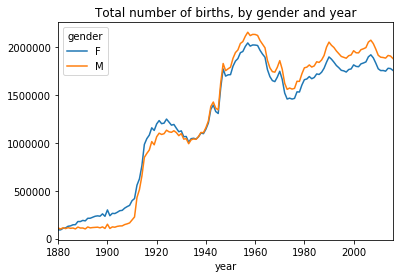

In [15]:
total_nbirth.plot(title="Total number of births, by gender and year")